# Exploracion de datos

In [12]:
import pandas as pd
import seaborn as sns

In [13]:
data = pd.read_csv('data_limpieza.csv')

In [14]:
data.head()
data

,PERIODO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,Si,Si,Si,A2,61.0,64,49,59,63,295
1,20192,URBANO,N,A,TÉCNICO/ACADÉMICO,SANTANDER,MIXTO,MAÑANA,BUCARAMANGA,OFICIAL,...,Si,Si,Si,A2,61.0,64,49,59,63,295
2,20192,RURAL,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,CHARALÁ,OFICIAL,...,No,No,Si,A1,54.0,69,55,48,57,285
3,20192,RURAL,N,A,ACADÉMICO,SANTANDER,MIXTO,MAÑANA,CHARALÁ,OFICIAL,...,No,No,Si,A1,54.0,69,55,48,57,285
4,20192,URBANO,N,A,TÉCNICO,NORTE SANTANDER,MIXTO,ÚNICA,VILLA DEL ROSARIO,OFICIAL,...,Si,Si,Si,A-,37.0,45,50,51,47,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119231,20221,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,SABATINA,BUCARAMANGA,NO OFICIAL,...,No,No,No,A-,34.0,55,57,53,57,269
119232,20221,URBANO,N,A,ACADÉMICO,NORTE SANTANDER,MIXTO,SABATINA,CÚCUTA,NO OFICIAL,...,No,No,No,A-,40.0,55,50,56,52,261
119233,20221,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,SABATINA,FLORIDABLANCA,NO OFICIAL,...,Si,No,Si,A-,32.0,34,34,35,38,175
119234,20221,URBANO,N,A,ACADÉMICO,SANTANDER,MIXTO,TARDE,BUCARAMANGA,NO OFICIAL,...,Si,No,Si,A1,49.0,49,53,50,60,263


In [15]:
features=["PERIODO","COLE_AREA_UBICACION","COLE_BILINGUE","COLE_CALENDARIO","COLE_CARACTER","COLE_DEPTO_UBICACION","COLE_GENERO","COLE_JORNADA","COLE_MCPIO_UBICACION","COLE_NATURALEZA","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NOMBRE_SEDE","ESTU_GENERO","ESTU_PRIVADO_LIBERTAD","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONMADRE","FAMI_EDUCACIONPADRE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_TIENEAUTOMOVIL","FAMI_TIENECOMPUTADOR","FAMI_TIENEINTERNET","FAMI_TIENELAVADORA","DESEMP_INGLES"]
X = data[features]
X = pd.get_dummies(X, columns=["COLE_AREA_UBICACION","COLE_BILINGUE","COLE_CALENDARIO","COLE_CARACTER","COLE_DEPTO_UBICACION","COLE_GENERO","COLE_JORNADA","COLE_MCPIO_UBICACION","COLE_NATURALEZA","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NOMBRE_SEDE","ESTU_GENERO","ESTU_PRIVADO_LIBERTAD","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONMADRE","FAMI_EDUCACIONPADRE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_TIENEAUTOMOVIL","FAMI_TIENECOMPUTADOR","FAMI_TIENEINTERNET","FAMI_TIENELAVADORA","DESEMP_INGLES"], dtype=int, drop_first=True)
X.head()
Y=data["PUNT_GLOBAL"]

In [16]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

In [17]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     211.8
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        22:27:42   Log-Likelihood:            -4.5971e+05
No. Observations:               95388   AIC:                         9.212e+05
Df Residuals:                   94522   BIC:                         9.294e+05
Df Model:                         865                                         
Covariance Type:            nonrobust                                         
                                                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------

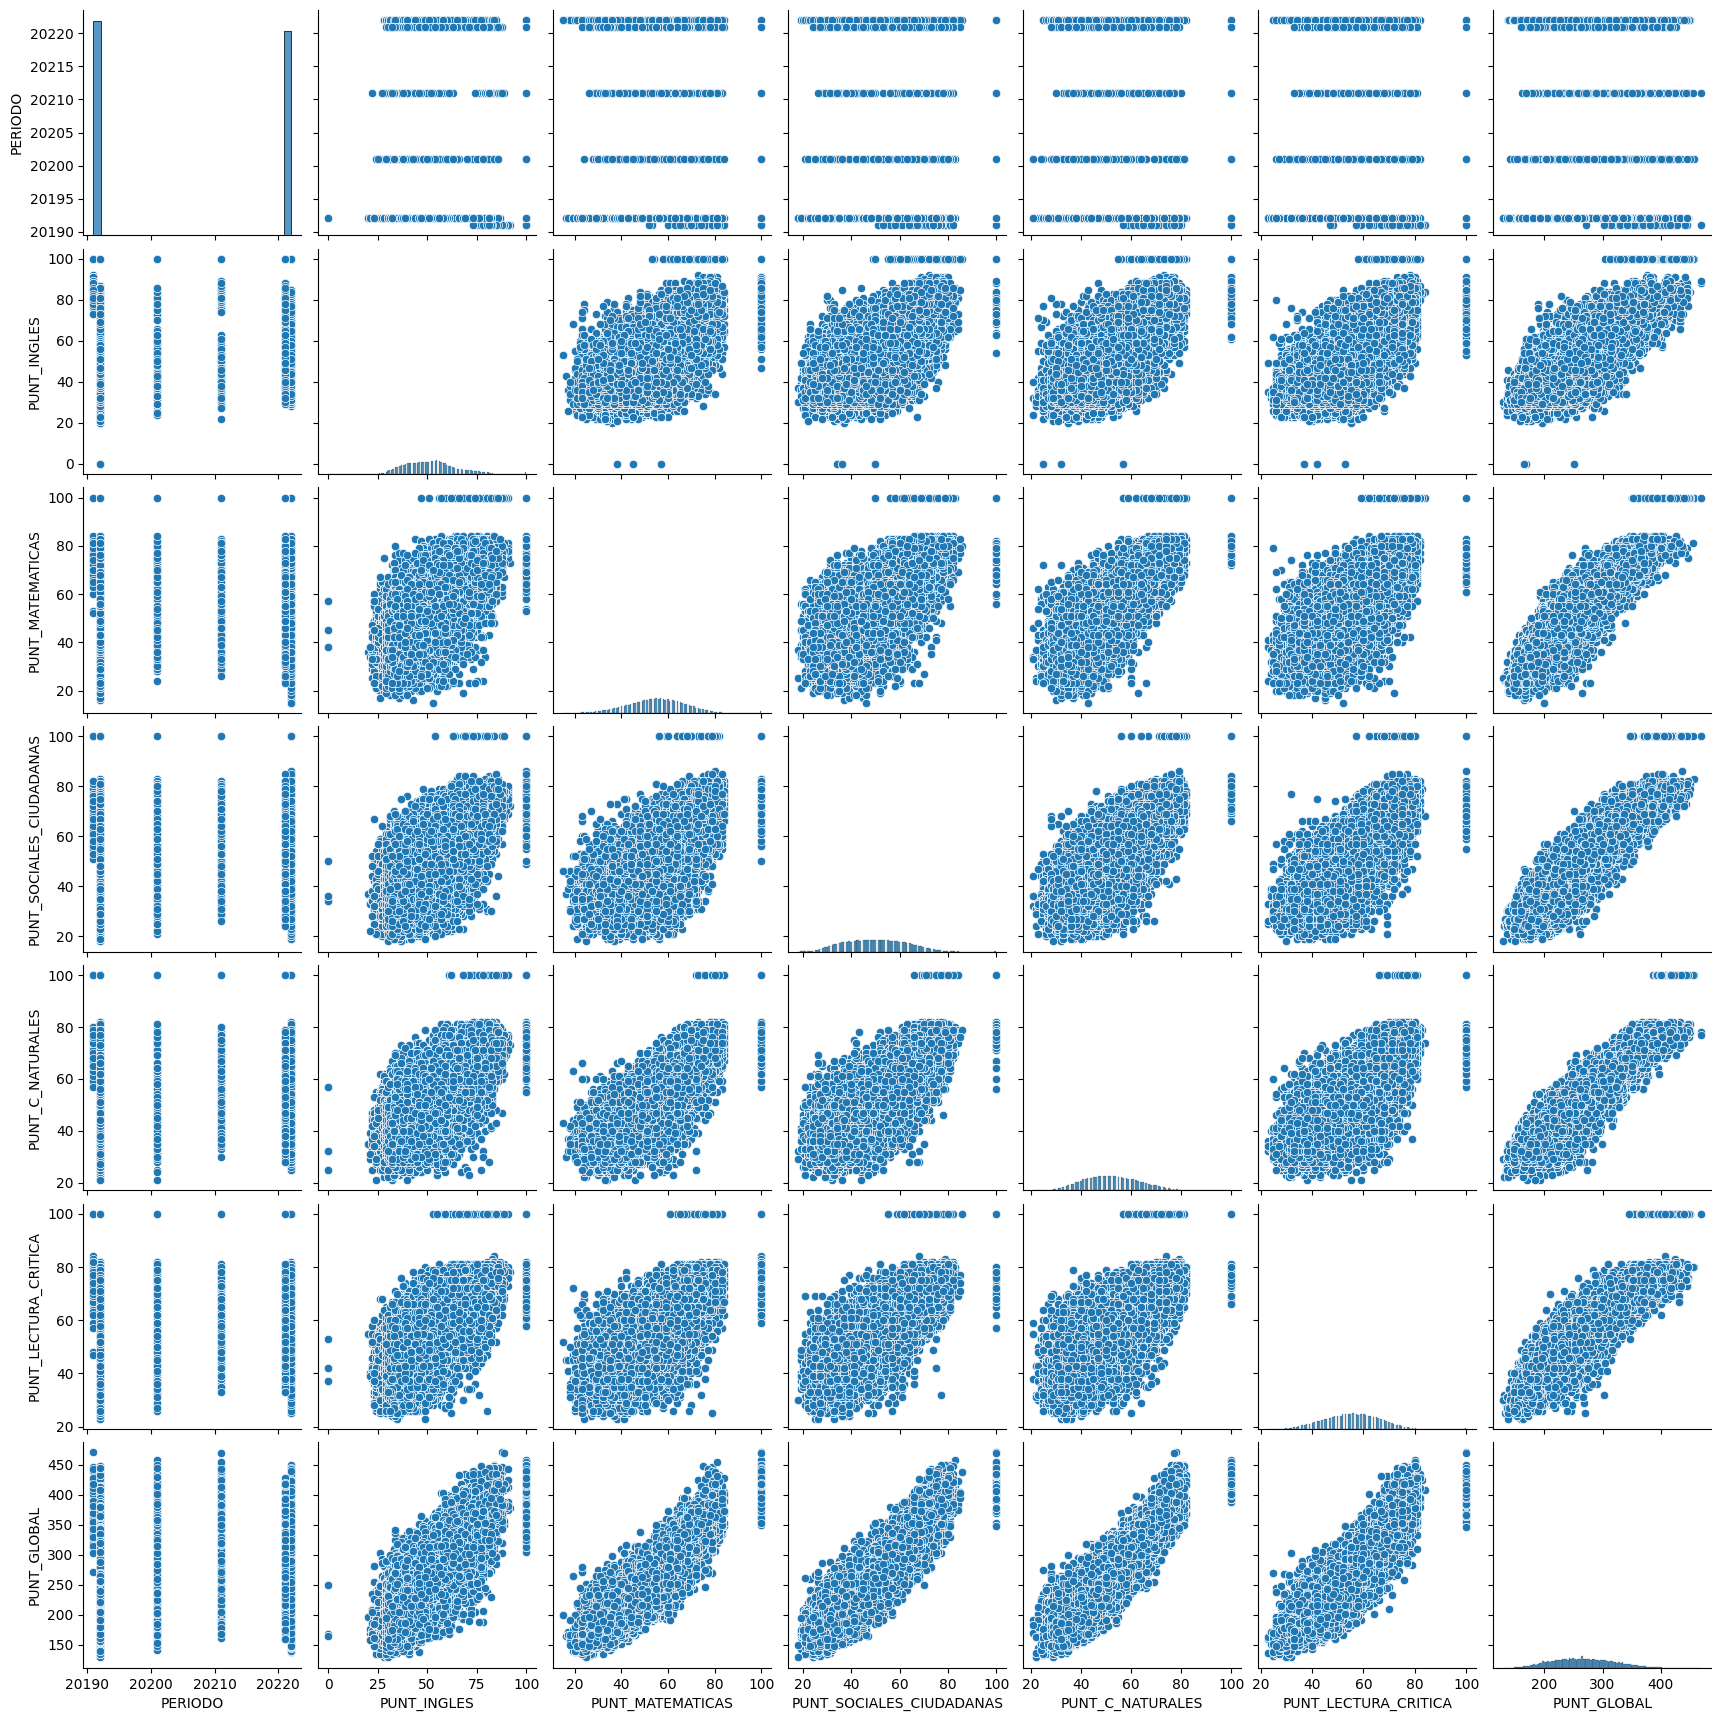

In [ ]:
features=["PERIODO","COLE_AREA_UBICACION","COLE_BILINGUE","COLE_CALENDARIO","COLE_CARACTER","COLE_DEPTO_UBICACION","COLE_GENERO","COLE_JORNADA","COLE_MCPIO_UBICACION","COLE_NATURALEZA","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NOMBRE_SEDE","ESTU_GENERO","ESTU_PRIVADO_LIBERTAD","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONMADRE","FAMI_EDUCACIONPADRE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_TIENEAUTOMOVIL","FAMI_TIENECOMPUTADOR","FAMI_TIENEINTERNET","FAMI_TIENELAVADORA","DESEMP_INGLES"]
data_filtered=data[features]

sns.pairplot(data_filtered,)